In [ ]:
from skimage import morphology,draw
import numpy as np
import matplotlib.pyplot as plt
import cv2

def readimage(t_name):
    image = cv2.imread(t_name,cv2.IMREAD_GRAYSCALE)
    ret,image=cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    image=255-image

    #实施骨架算法
    skeleton =morphology.skeletonize(image)

    skeleton=255-skeleton
    image=255-image
    skeleton[skeleton!=255]=0
    return image,skeleton

In [2]:
import os

from tqdm import tqdm


pathfu = "./traindata/fu/"
pathnotfu = "./traindata/not_fu/"
pathtest = "./testdata/"

data=np.zeros((209+696+10,250000))
y = np.concatenate((2*np.ones(209), 1*np.ones(696),2*np.ones(5), 1*np.ones(5)))

all=[pathfu + i for i in os.listdir(pathfu)]+[pathnotfu + i for i in os.listdir(pathnotfu)]+[pathtest + i for i in os.listdir(pathtest)]
for index,i in enumerate(tqdm(all)):
    _,skeleton=readimage(i)
    skeleton=skeleton.flatten()
    data[index]=skeleton

100%|██████████| 915/915 [00:17<00:00, 52.54it/s]


In [ ]:
data.shape,y.shape

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(data[:209+696,:], y[:209+696])

In [ ]:
from sklearn.manifold import MDS
embedding = MDS(n_components=3, normalized_stress='auto')
X_transformed = embedding.fit_transform(data[:209+696,:])

In [ ]:
transformed=clf.transform(data[:209+696,:])

In [4]:
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
embedding = make_pipeline(StandardScaler(),LocallyLinearEmbedding(n_components=3,method="modified"))
X_transformed = embedding.fit_transform(data)
X_transformed.shape

/home/zhaohui/anaconda3/envs/cjl/lib/python3.10/site-packages/sklearn/manifold/_locally_linear.py:476: RuntimeWarning: invalid value encountered in double_scalars
  alpha_i = np.linalg.norm(Vi.sum(0)) / np.sqrt(s_i)


(915, 3)

In [ ]:
[:209+696,:]

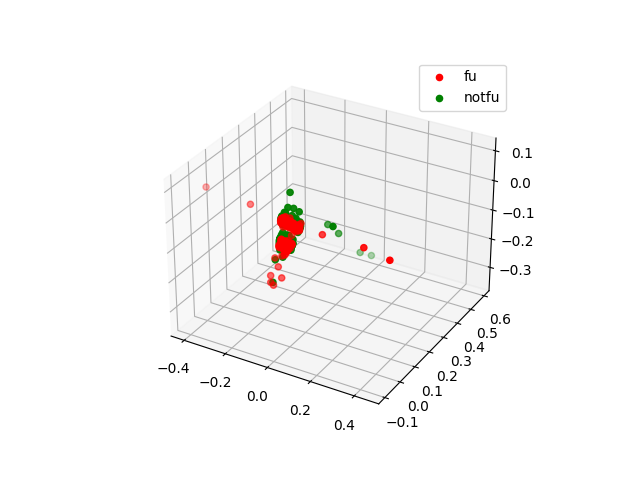

In [5]:
%matplotlib widget
# fig, ax = plt.subplots()
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_transformed[:209,0],X_transformed[:209,1],X_transformed[:209,2],c="r",label="fu")
ax.scatter(X_transformed[209:,0],X_transformed[209:,1],X_transformed[209:,2],c="g",label="notfu")
ax.legend()
ax.grid(True)

plt.show()